In [8]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns  # visualization tool

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


In [9]:
df = pd.read_csv('/Electric_Vehicle_Population_Size_History_By_County_.csv')
df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,September 30 2022,Riverside,CA,Passenger,7,0,7,460,467,1.50
1,December 31 2022,Prince William,VA,Passenger,1,2,3,188,191,1.57
2,January 31 2020,Dakota,MN,Passenger,0,1,1,32,33,3.03
3,June 30 2022,Ferry,WA,Truck,0,0,0,"3,575","3,575",0.00
4,July 31 2021,Douglas,CO,Passenger,0,1,1,83,84,1.19


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Date                                      20819 non-null  object 
 1   County                                    20733 non-null  object 
 2   State                                     20733 non-null  object 
 3   Vehicle Primary Use                       20819 non-null  object 
 4   Battery Electric Vehicles (BEVs)          20819 non-null  object 
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  object 
 6   Electric Vehicle (EV) Total               20819 non-null  object 
 7   Non-Electric Vehicle Total                20819 non-null  object 
 8   Total Vehicles                            20819 non-null  object 
 9   Percent Electric Vehicles                 20819 non-null  float64
dtypes: float64(1), object(9)
memory us

# **Convert String Data Types To Numeric**

In [11]:
# Converting string columns to numeric (float), handling commas as thousands separators
for col in ['Battery Electric Vehicles (BEVs)', 'Plug-In Hybrid Electric Vehicles (PHEVs)',
            'Electric Vehicle (EV) Total', 'Non-Electric Vehicle Total', 'Total Vehicles']:
    df[col] = df[col].str.replace(',', '').astype(float)

df['Date'] = pd.to_datetime(df['Date'])

df.head()

,Date,County,State,Vehicle Primary Use,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles
0,2022-09-30,Riverside,CA,Passenger,7.0,0.0,7.0,460.0,467.0,1.50
1,2022-12-31,Prince William,VA,Passenger,1.0,2.0,3.0,188.0,191.0,1.57
2,2020-01-31,Dakota,MN,Passenger,0.0,1.0,1.0,32.0,33.0,3.03
3,2022-06-30,Ferry,WA,Truck,0.0,0.0,0.0,3575.0,3575.0,0.00
4,2021-07-31,Douglas,CO,Passenger,0.0,1.0,1.0,83.0,84.0,1.19


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20819 entries, 0 to 20818
Data columns (total 10 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Date                                      20819 non-null  datetime64[ns]
 1   County                                    20733 non-null  object        
 2   State                                     20733 non-null  object        
 3   Vehicle Primary Use                       20819 non-null  object        
 4   Battery Electric Vehicles (BEVs)          20819 non-null  float64       
 5   Plug-In Hybrid Electric Vehicles (PHEVs)  20819 non-null  float64       
 6   Electric Vehicle (EV) Total               20819 non-null  float64       
 7   Non-Electric Vehicle Total                20819 non-null  float64       
 8   Total Vehicles                            20819 non-null  float64       
 9   Percent Electric Vehicles   

# **EV Sale Ratio Per Year**

In [13]:
df['Year'] = df['Date'].dt.year

yearly_sums = df.groupby('Year').agg({
    'Electric Vehicle (EV) Total': 'sum',
    'Non-Electric Vehicle Total': 'sum',
    'Total Vehicles': 'sum'
}).reset_index()

yearly_sums['EV to Total Vehicles Ratio'] = yearly_sums['Electric Vehicle (EV) Total'] / yearly_sums['Total Vehicles']

yearly_sums



,Year,Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,EV to Total Vehicles Ratio
0,2017,304741.0,71349342.0,71654083.0,0.004253
1,2018,416635.0,72357023.0,72773658.0,0.005725
2,2019,577980.0,73549211.0,74127191.0,0.007797
3,2020,715810.0,73880900.0,74596710.0,0.009596
4,2021,914806.0,74263074.0,75177880.0,0.012169
5,2022,1214793.0,73323678.0,74538471.0,0.016298
6,2023,1705405.0,72126741.0,73832146.0,0.023098
7,2024,345145.0,11666595.0,12011740.0,0.028734


# **EV Sale Ratio Per Year Chart**

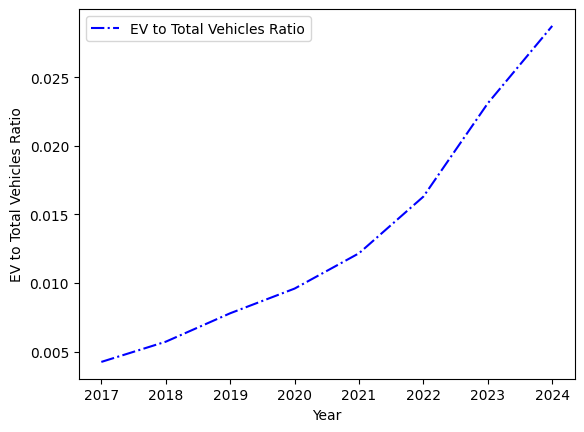

In [14]:
plt.plot(yearly_sums['Year'], yearly_sums['EV to Total Vehicles Ratio'], color='blue', label='EV to Total Vehicles Ratio', linestyle='-.')
plt.xlabel('Year')
plt.ylabel('EV to Total Vehicles Ratio')
plt.legend()


# **Correlation**

In [15]:
df_corr = df.select_dtypes(include=[np.number])
df_corr.corr()

,Battery Electric Vehicles (BEVs),Plug-In Hybrid Electric Vehicles (PHEVs),Electric Vehicle (EV) Total,Non-Electric Vehicle Total,Total Vehicles,Percent Electric Vehicles,Year
Battery Electric Vehicles (BEVs),1.000000,0.981358,0.999092,0.779821,0.789699,-0.012019,0.046497
Plug-In Hybrid Electric Vehicles (PHEVs),0.981358,1.000000,0.988656,0.870713,0.878351,-0.020843,0.035831
Electric Vehicle (EV) Total,0.999092,0.988656,1.000000,0.802487,0.811900,-0.014014,0.044283
Non-Electric Vehicle Total,0.779821,0.870713,0.802487,1.000000,0.999873,-0.063489,-0.028053
Total Vehicles,0.789699,0.878351,0.811900,0.999873,1.000000,-0.062494,-0.026264
Percent Electric Vehicles,-0.012019,-0.020843,-0.014014,-0.063489,-0.062494,1.000000,0.118437
Year,0.046497,0.035831,0.044283,-0.028053,-0.026264,0.118437,1.000000


# **Correlation Heat Map**

<Axes: title={'center': 'EV Sales Correlation Heat Map'}>

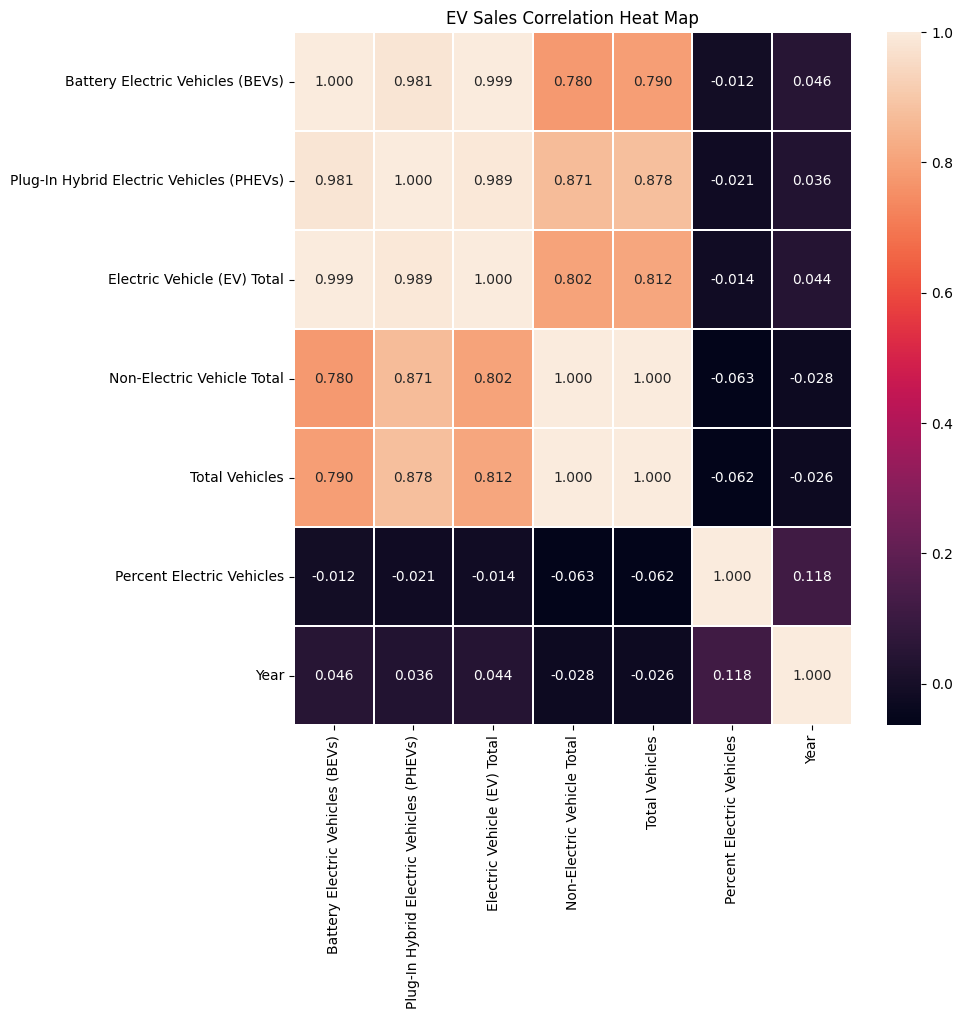

In [16]:

f, ax = plt.subplots(figsize=(9, 9))
ax.set_title('EV Sales Correlation Heat Map')
sns.heatmap(df_corr.corr(), annot=True, robust=True, linewidths=.1, fmt= '.3f', ax = ax )